## S&P 500 Sector Performance Overview

This notebook loads daily prices for the eleven SPDR sector ETFs (XLC, XLY, XLP, XLE, XLF, XLV, XLI, XLB, XLRE, XLK, XLU), filters the last year of data, and compares their cumulative returns across multiple horizons.

### Data Pipeline
- Download or reuse cached CSVs from `yfinance`, keeping only the `Close` prices per ticker.
- Rename columns so every series shows `Ticker - Sector` in plots and reports.
- Limit the analysis window to the most recent 12 months to highlight current trends.
- Compute simple daily returns with `pct_change()` and roll them into cumulative performance via `(1 + r).cumprod() - 1`.

### Visualization Blocks
1. **Full-year cumulative returns**: compares every sector over the past 12 months.
2. **Last 6 months**: focuses on mid-term rotations and acceleration.
3. **Last 3 months**: captures short-term leadership shifts.

### Key Takeaways
- Identify which sectors lead or lag over each horizon.
- Observe whether leadership is broad-based or concentrated in a few sectors.
- Use the shortened windows to spot emerging trends that may not appear in the full-year chart.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [30]:
# portfolio of sector ETFs and their names
ticker_sector_map = {
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLK": "Technology",
    "XLU": "Utilities",
}

tickers = list(ticker_sector_map.keys())
sector_labels = {ticker: f"{ticker} - {name}" for ticker, name in ticker_sector_map.items()}

In [ ]:
start_date = "2023-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv, filename have tickers joined by underscore and end_date
# data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

In [32]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# set index as datetime
df.index = pd.to_datetime(df.index)

# keep only level 1 'Close' prices
df = df.xs('Close', level=1, axis=1)

# use descriptive names in charts/legends
df = df.rename(columns=sector_labels)

# Show the result
df.head()

Ticker,XLC - Communication Services,XLI - Industrials,XLRE - Real Estate,XLU - Utilities,XLF - Financials,XLP - Consumer Staples,XLY - Consumer Discretionary,XLE - Energy,XLK - Technology,XLV - Health Care,XLB - Materials
Date,,,,,,,,,,,
2020-01-02,51.380817,75.619820,31.564331,53.293392,27.882175,53.715721,120.790977,47.418167,88.833046,93.080238,54.046124
2020-01-03,51.049397,75.474075,31.795572,53.401966,27.586126,53.629742,119.763046,47.277275,87.834290,92.269119,53.173550
2020-01-06,51.731201,75.501396,31.803823,53.452076,27.568184,53.741501,120.096161,47.645161,88.043549,92.843285,52.942036
2020-01-07,51.797485,75.346527,31.456972,53.376904,27.388769,53.328846,119.905792,47.519920,88.005486,92.661011,52.879719
2020-01-08,52.166779,75.601601,31.613874,53.351860,27.568184,53.526569,120.267479,46.737183,88.947197,93.262520,53.066696


In [33]:
# date filter
# keep only last year of data
one_year_ago = dt.datetime.now() - dt.timedelta(days=365)
df = df[df.index >= one_year_ago]

In [35]:
# calculate simple returns with pct_change()
simple_returns = df.pct_change().fillna(0)

# cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

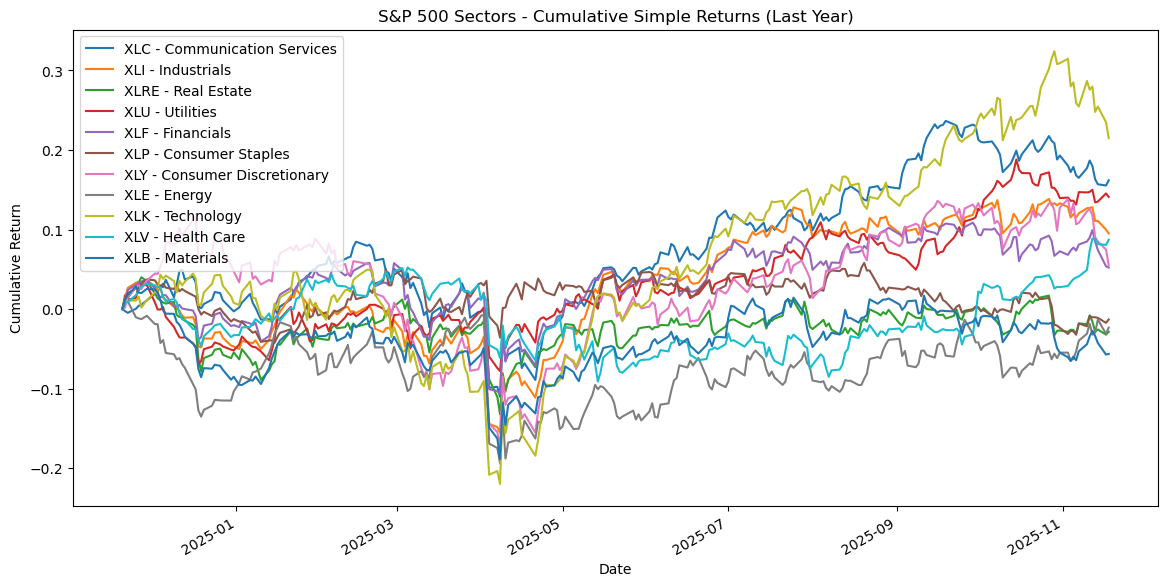

In [ ]:
# plot cumprod_simple
fig = go.Figure()
for column in cumprod_simple.columns:
    fig.add_trace(
        go.Scatter(
            x=cumprod_simple.index,
            y=cumprod_simple[column],
            mode="lines",
            name=column,
        )
    )

fig.update_layout(
    title="S&P 500 Sectors - Cumulative Simple Returns (Last Year)",
    xaxis_title="Date",
    yaxis_title="Cumulative Return",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
    template="plotly_white",
)
fig.show()

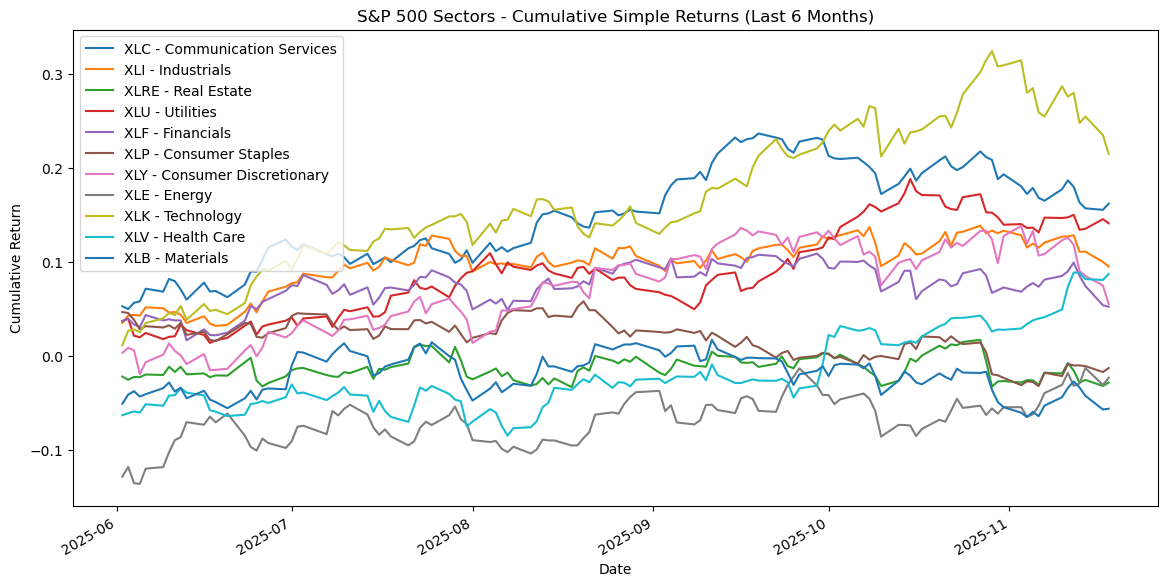

In [ ]:
# plot last 6 months only
cumprod_simple_last_6_months = cumprod_simple.last('6M')
fig = go.Figure()
for column in cumprod_simple_last_6_months.columns:
    fig.add_trace(
        go.Scatter(
            x=cumprod_simple_last_6_months.index,
            y=cumprod_simple_last_6_months[column],
            mode="lines",
            name=column,
        )
    )

fig.update_layout(
    title="S&P 500 Sectors - Cumulative Simple Returns (Last 6 Months)",
    xaxis_title="Date",
    yaxis_title="Cumulative Return",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
    template="plotly_white",
)
fig.show()

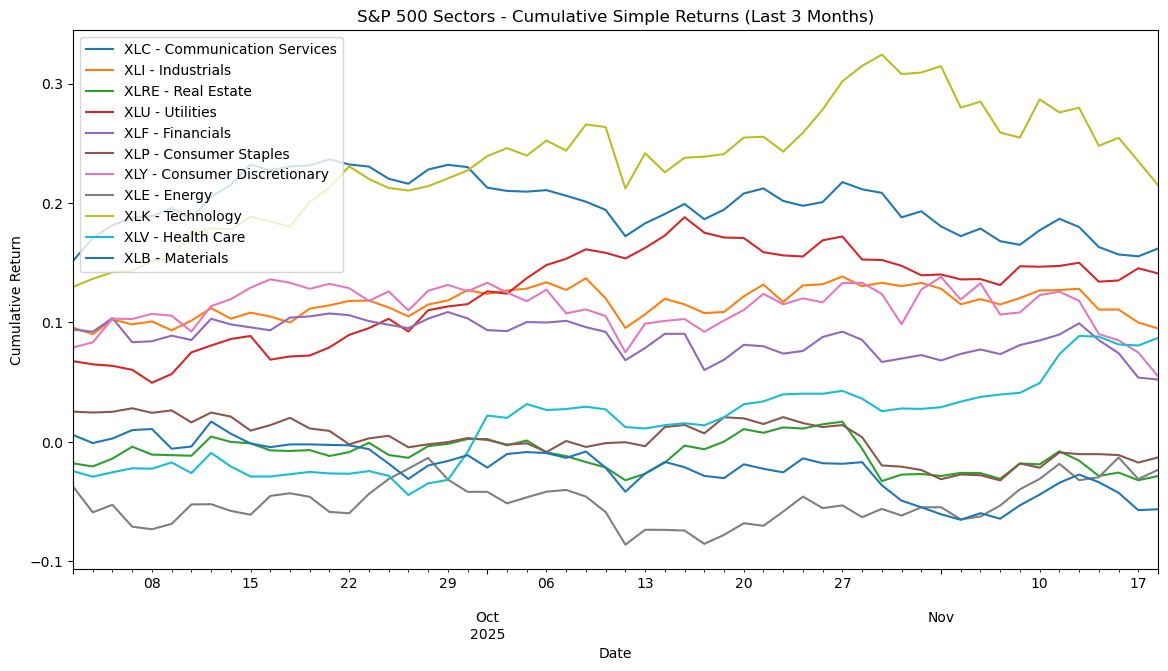

In [ ]:
# plot last 3 months only
cumprod_simple_last_3_months = cumprod_simple.last('3M')
fig = go.Figure()
for column in cumprod_simple_last_3_months.columns:
    fig.add_trace(
        go.Scatter(
            x=cumprod_simple_last_3_months.index,
            y=cumprod_simple_last_3_months[column],
            mode="lines",
            name=column,
        )
    )

fig.update_layout(
    title="S&P 500 Sectors - Cumulative Simple Returns (Last 3 Months)",
    xaxis_title="Date",
    yaxis_title="Cumulative Return",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
    template="plotly_white",
)
fig.show()